<a href="https://colab.research.google.com/github/maxim920/CPP/blob/main/Kosenko_lab8_1_4_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


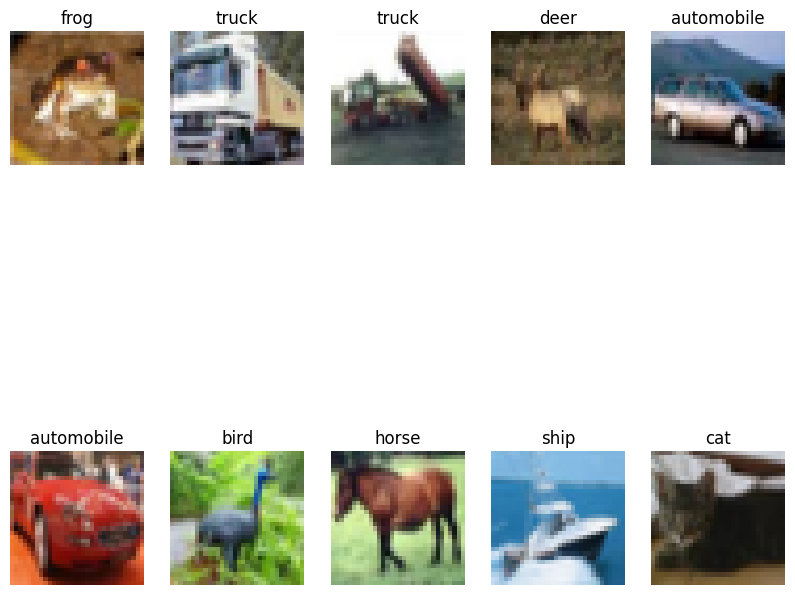

In [2]:
# 1. Завантаження та візуалізація даних
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Назви класів CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Візуалізація перших 10 зображень
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [3]:
# 2. Підготовка даних
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
# 3. Створення моделі
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = create_cnn_model()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# 4. Налаштування колбеків
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.0001
)

# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# 5. Виведення summary
model.summary()

# Навчання моделі
batch_size = 32
epochs = 30

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,210 (481.29 KB)

 Trainable params: 122,890 (480.04 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 92s 71ms/step - accuracy: 0.3401 - loss: 1.9881 - val_accuracy: 0.5420 - val_loss: 1.2723 - learning_rate: 0.0010
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 69ms/step - accuracy: 0.5356 - loss: 1.3197 - val_accuracy: 0.6026 - val_loss: 1.1094 - learning_rate: 0.0010
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 89s 71ms/step - accuracy: 0.5969 - loss: 1.1500 - val_accuracy: 0.5760 - val_loss: 1.2059 - learning_rate: 0.0010
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 69ms/step - accuracy: 0.6390 - loss: 1.0351 - val_accuracy: 0.6007 - val_loss: 1.1966 - learning_rate: 0.0010
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 69ms/step - accuracy: 0.6688 - loss: 0.9448 - val_accuracy: 0.6533 - val_loss: 0.9878 - learning_rate: 0.0010
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.6928 - loss: 0.8924 - val_accuracy: 0.6757 - val_loss: 0.9317 - learning_rate: 0.0010
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 68ms/step - ac

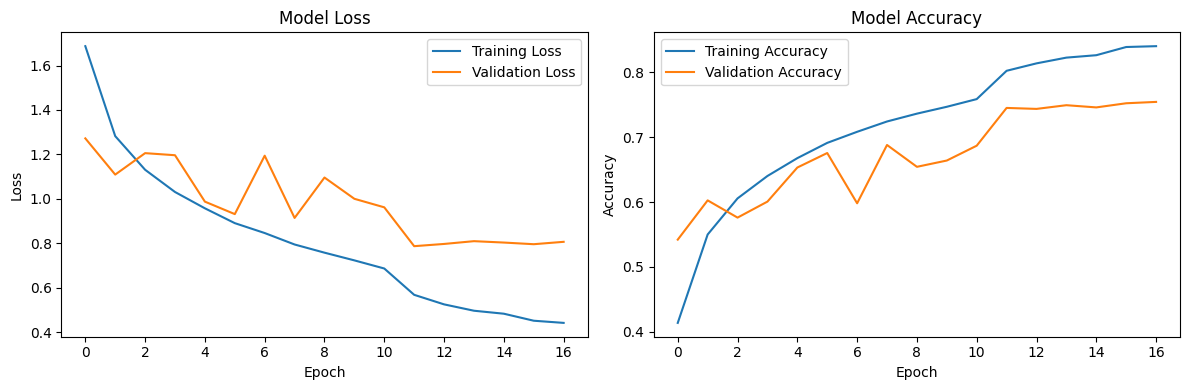

In [8]:
# 6. Побудова графіків
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# 7. Класифікаційний звіт
y_pred = np.argmax(model.predict(X_test), axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step

Classification Report:
              precision    recall  f1-score   support

    airplane       0.74      0.80      0.77      1000
  automobile       0.84      0.87      0.86      1000
        bird       0.63      0.65      0.64      1000
         cat       0.57      0.59      0.58      1000
        deer       0.72      0.70      0.71      1000
         dog       0.66      0.65      0.66      1000
        frog       0.83      0.80      0.82      1000
       horse       0.80      0.80      0.80      1000
        ship       0.86      0.83      0.85      1000
       truck       0.88      0.80      0.84      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


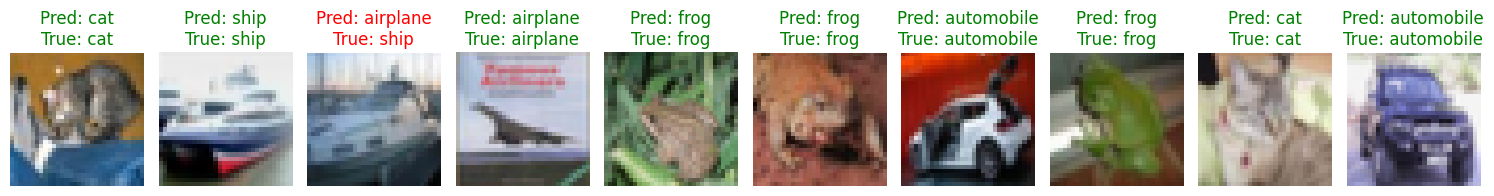

In [10]:
# 8. Візуалізація розпізнавання
def plot_predictions(model, X, y, class_names, num_images=10):
    predictions = model.predict(X[:num_images])
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(X[i])
        pred_label = class_names[np.argmax(predictions[i])]
        true_label = class_names[y[i][0]]
        color = 'green' if pred_label == true_label else 'red'
        plt.title(f'Pred: {pred_label}\nTrue: {true_label}', color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_predictions(model, X_test, y_test, class_names)

Висновки
Архітектура моделі виявилася досить ефективною для даної задачі, маючи відносно невелику кількість параметрів (123,210), що робить її легкою для навчання та використання.
Процес навчання тривав 17 епох (із запланованих 30) і був зупинений механізмом ранньої зупинки, що свідчить про досягнення оптимальної точності та запобігання перенавчанню.
Спостерігається стабільне покращення точності: з 34% на першій епосі до 84% на останній епосі для тренувального набору, що вказує на хороший процес навчання.
Фінальні метрики на тестовому наборі показують загальну точність 75%, що є достатньо хорошим результатом для задачі класифікації CIFAR-10.
Аналіз класифікаційного звіту показує:

Найкраще модель розпізнає вантажівки (truck, precision 88%) та кораблі (ship, precision 86%)
Найгірше справляється з розпізнаванням котів (cat, precision 57%) та птахів (bird, precision 63%)
Всі класи мають збалансовані показники precision та recall, що свідчить про стабільність моделі


Механізм зменшення швидкості навчання спрацював двічі (на 12-й та 16-й епохах), що допомогло точніше налаштувати ваги моделі.

Загалом, модель демонструє хороші результати для базової CNN архітектури, хоча є потенціал для покращення, особливо в розпізнаванні складних класів як коти та птахи.